<a href="https://colab.research.google.com/github/YujiSue4Edu/TWMU_2020/blob/master/11200106.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 課題１
## AIによる画像識別  
  以下のいずれかを実行してください  
  
*  PC/スマホに画像を保存してから使いたいとき
  1.  左のフォルダアイコンをクリックして「アップロード」
  をクリック/タップして、画像をアップロードします  
  2.  下セルのコード10行目の「画像名 = 」の右に、引用符でくくった画像ファイル名を記入してください  
  ![代替テキスト](https://user-images.githubusercontent.com/25998652/83730351-e7e9b080-a683-11ea-9d22-932263316543.png)
  
*  ネット上の画像を使いたいとき  
  1.  画像ファイル名を決める  
  下セルのコード10行目の「画像名 = 」の右に、引用符でくくった画像ファイル名を記入してください
  2.  画像のURLを調べる  
  使いたい画像をブラウザで開いて、ブラウザ上部のアドレスをコピーします  
  3.  下のセルの15行目「画像のURL = 」の右側に、引用符でくくって画像のURLをペーストしてください

  ※ 注意：画像のURLは必ず画像本体を示すアドレスでなくてはいけません  
  例えばTwitterなどで画像を開くと、以下のようなアドレスのページが開きますが、これは画像本体を表すURLではありません  
  https://twitter.com/SHARP_JP/status/717912259607994370/photo/1  
  表示される画像の上で「右クリック(Macの場合はControlキー押しながらクリック)」をして、「画像だけを表示」してアドレスをコピーしてください  
  例：https://pbs.twimg.com/media/CfaJZPjUMAAfXas?format=jpg&name=small



URL has an invalid label.


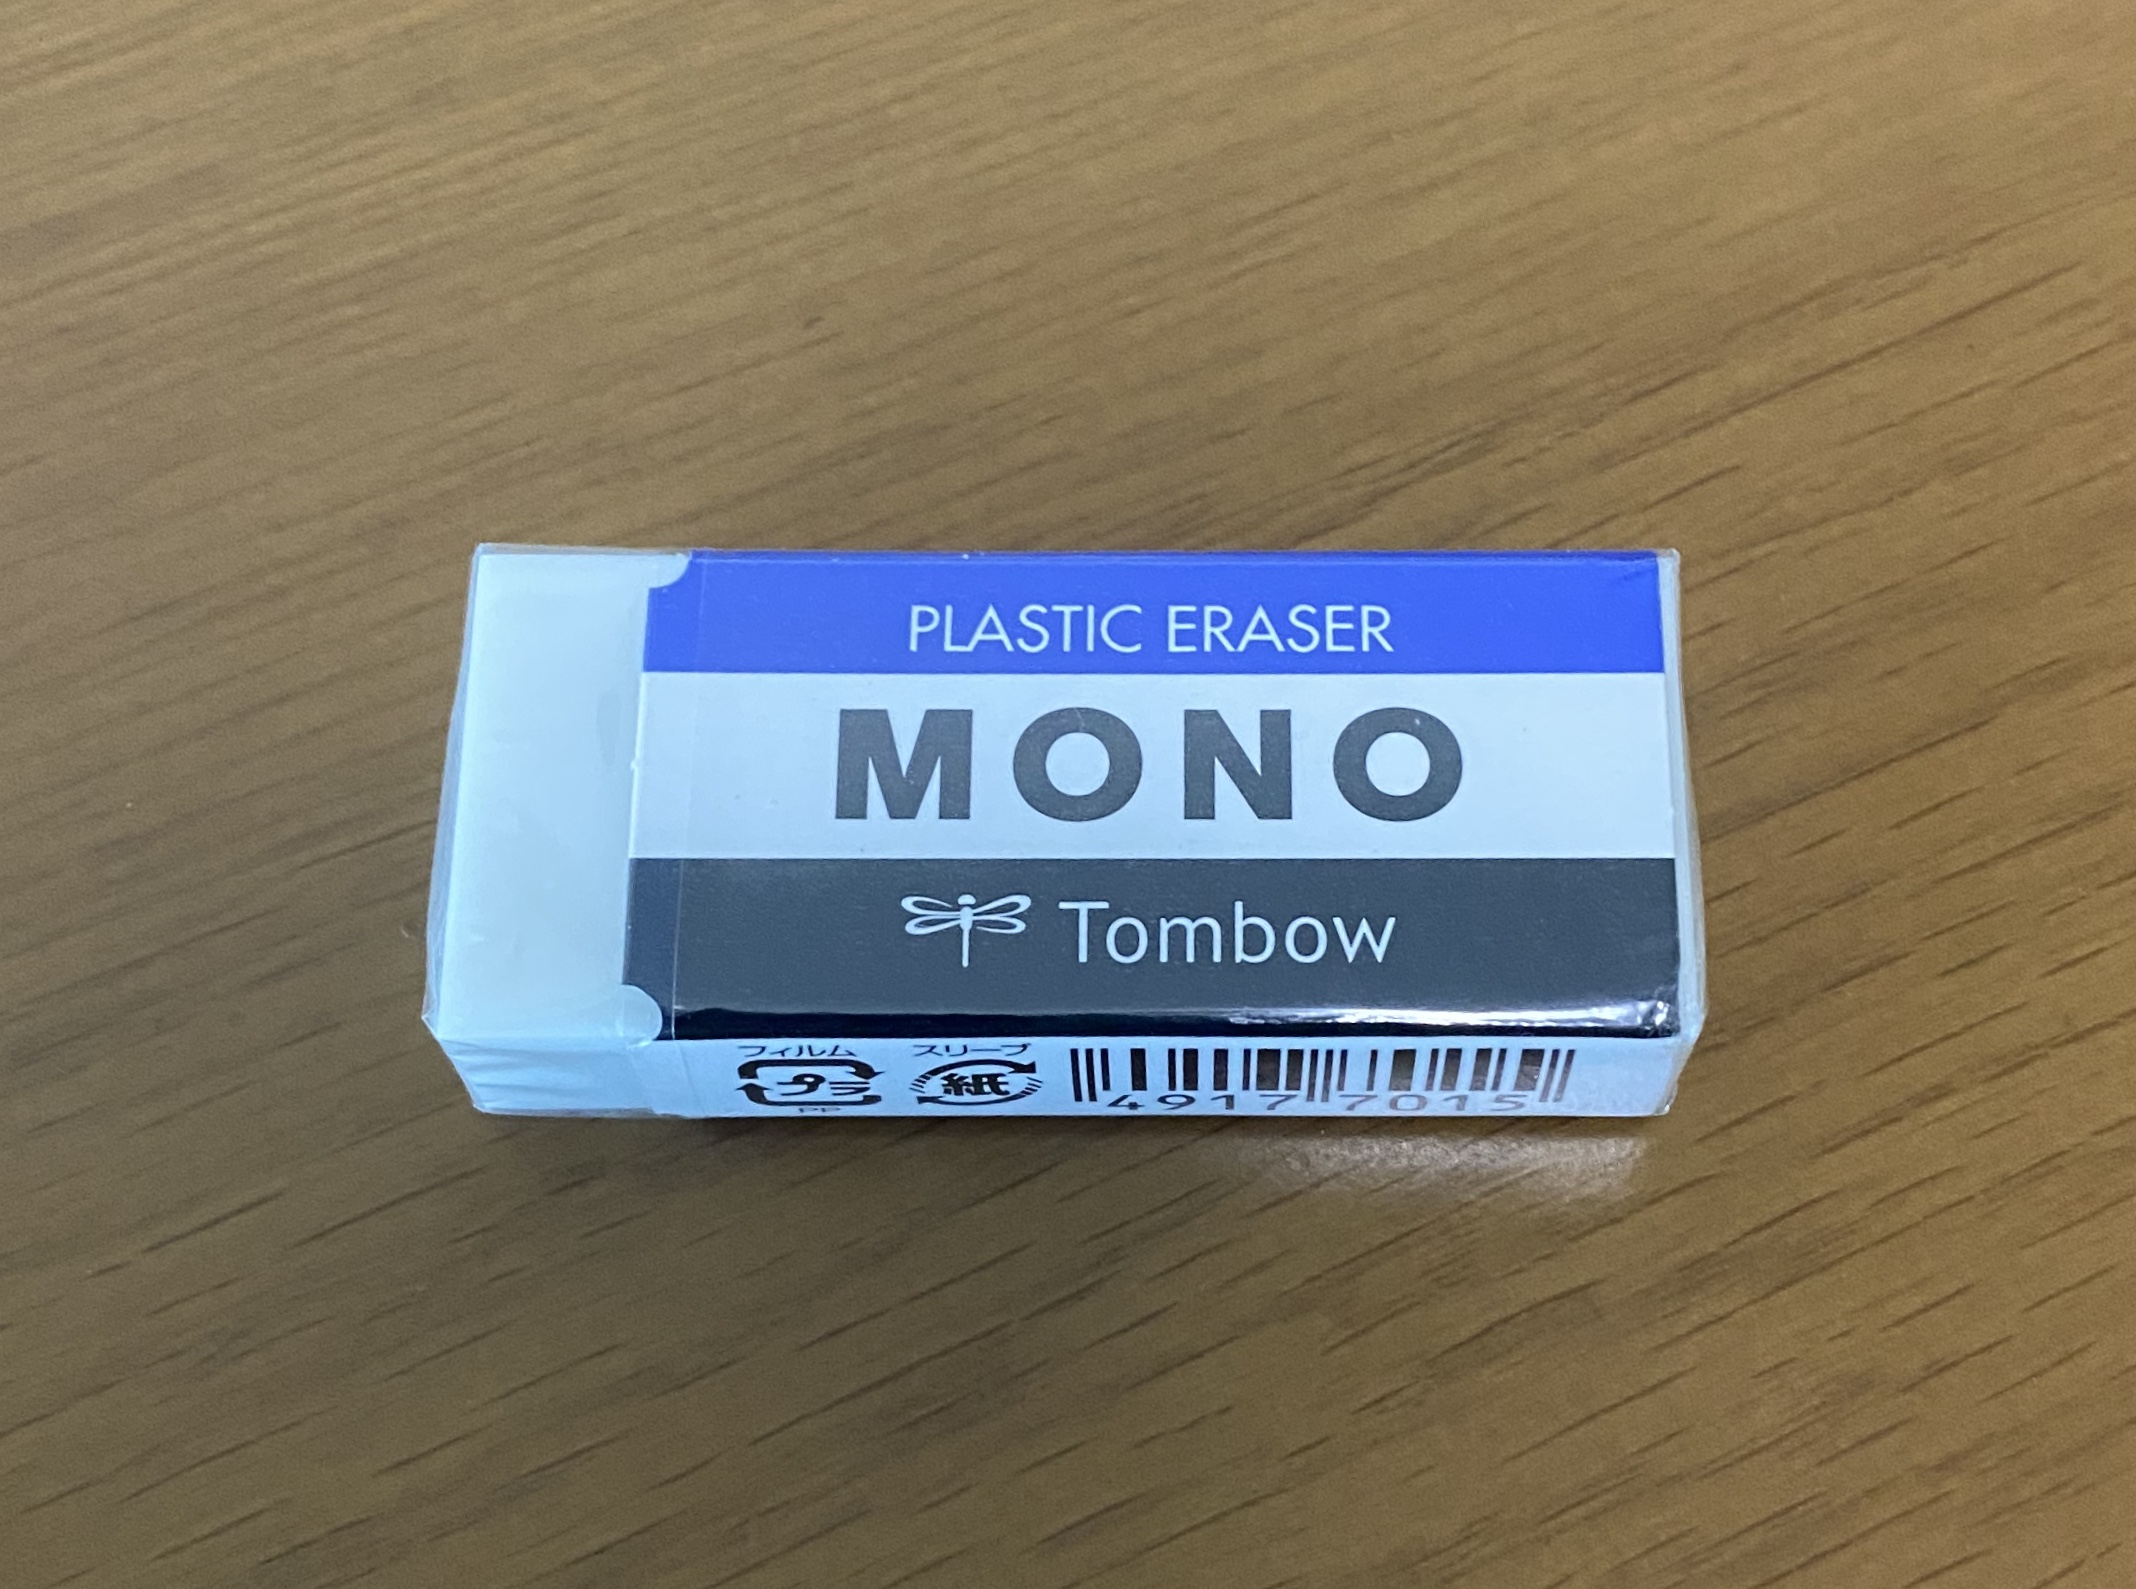

第１候補： rubber_eraser (予想確率： 79.53826189041138 ％）
第２候補： modem (予想確率： 5.314480885863304 ％）
第３候補： packet (予想確率： 4.416641592979431 ％）


In [12]:
#必要なPythonプログラムを読み込み
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import requests
from IPython.display import Image, display_jpeg, display_png, display_pdf

# 画像の名前を指定
画像名 = 'E8C44AFA-EC60-403B-A89D-DA4441AABBED.jpeg' # ←画像ファイル名を入れてください

#########　ネット上の画像を使用する場合　######## 
#画像をダウンロード
try:
  画像のURL = 'https://*' # ←画像のアドレス(URL)を入れてください
  response = requests.get(画像のURL)
  #画像ファイルを保存
  画像ファイル = open(画像名, 'wb')
  画像ファイル.write(response.content)
except Exception as e:
  print(e)
################################################## 

# すでに研究者が学習させた人工知能を読み込みます
テストAI = ResNet50(weights='imagenet')

# さきほどダウンロードした画像をあらためて読み込みます
画像 = image.load_img(画像名, target_size=(224, 224))

# 画像データをAIが認識できる形に変換・前処理します
変換画像 = image.img_to_array(画像)
変換画像 = np.expand_dims(変換画像, axis=0)
変換画像 = preprocess_input(変換画像)
# AIに予測させて結果を取得します
予測 = テストAI.predict(変換画像)
結果 = decode_predictions(予測, top=3)[0]

# 3.結果を表示
display_jpeg(Image(画像名))
# ※画像ファイルがPNG形式の場合は
# display_png(Image('画像ファイル'))

print('第１候補：', 結果[0][1], '(予想確率：', 結果[0][2]*100, '％）')
print('第２候補：', 結果[1][1], '(予想確率：', 結果[1][2]*100, '％）')
print('第３候補：', 結果[2][1], '(予想確率：', 結果[2][2]*100, '％）')